## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
class NaiveBayes:
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)
        
        # Calculate mean, variance, and prior for each of the class
        self._mean = np.zeros((n_classes, n_features))
        self._var = np.zeros((n_classes, n_features))
        self._prior = np.zeros(n_classes)
        
        for idx, c in enumerate(self._classes):
            X_c = X[y == c]
            self._mean[idx, :] = X_c.mean(axis = 0)
            self._var[idx, :] = X_c.var(axis = 0)
            self._prior[idx] = X_c.shape[0] / n_samples
            
    def predict(self, X):
        y_pred = np.array([self._predict(x) for x in X])
        return y_pred
    
    def _predict(self, x):
        posteriors = []
        
        # Calculate posteriors probability for each class
        for idx, c in enumerate(self._classes):
            prior = np.log(self._prior[idx])
            posterior = np.sum(np.log(self._pdf(idx, x)))
            posterior += prior
            posteriors.append(posterior)
            
        # Return class with highest posterior
        return self._classes[np.argmax(posteriors)]
    
    def _pdf(self,  class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp(-((x - mean) ** 2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator

### Load the Dataset

In [3]:
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


### Split into Input X and Output Y

In [4]:
X = dataset.iloc[: , : -1].values
y = dataset.iloc[: , -1].values

print('X Shape :', X.shape)
print('y shape :', y.shape)

X Shape : (400, 2)
y shape : (400,)


### Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

### Split into Training and Test Set

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print('X_train Shape :', X_train.shape)
print('y_train Shape :', y_train.shape)
print('X_test Shape :', X_test.shape)
print('y_test Shape :', y_test.shape)

X_train Shape : (320, 2)
y_train Shape : (320,)
X_test Shape : (80, 2)
y_test Shape : (80,)


### Fit the data to the model

In [12]:
clf = NaiveBayes()
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
print(np.mean(predictions == y_test))

0.9375


### Visualize The Results For Training Examples

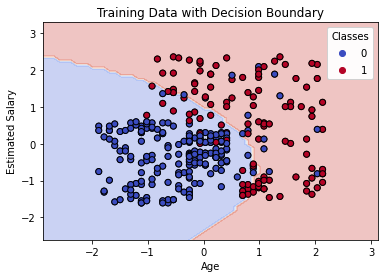

In [14]:
def plot_decision_boundary(model, X, y, title):
    # Create a mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    
    # Predict for every point in the meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='coolwarm')
    legend1 = plt.legend(*scatter.legend_elements(), title="Classes")
    plt.gca().add_artist(legend1)
    
    # Plot the decision boundary by assigning a color to each point in the meshgrid
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='coolwarm')
    plt.title(title)
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.show()

# Plot training results with decision boundary
plot_decision_boundary(clf, X_train, y_train, "Training Data with Decision Boundary")

### Visualize The Results For Testing Examples

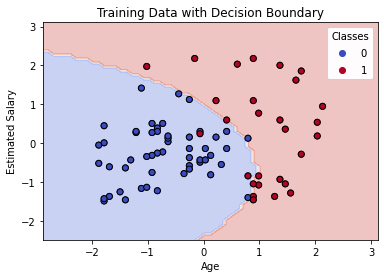

In [16]:
plot_decision_boundary(clf, X_test, y_test, "Training Data with Decision Boundary")